In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [2]:
world_income=pd.read_csv("Data/data-projet7.csv",decimal=',')
intouchable=world_income.copy()
analyse=pd.read_csv('Data/Analyse.csv')
gini=pd.read_csv('Data/Gini.csv',header=2)
pop=pd.read_csv('Data/pop.csv')
big_data=pd.read_csv('Data/GDIMMay2018.csv')
final_elas=pd.read_csv('Data/final_elas.csv')
final_elas1=final_elas.copy()

# Mission 1


In [3]:
pop

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,27294.031,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
1,OA,Séries temporelles annuelles,ZAF,Afrique du Sud,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,50412.129,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
2,OA,Séries temporelles annuelles,ALB,Albanie,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,2991.651,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
3,OA,Séries temporelles annuelles,DZA,Algérie,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,34860.715,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
4,OA,Séries temporelles annuelles,DEU,Allemagne,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,81130.944,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,OA,Séries temporelles annuelles,VEN,Venezuela (République bolivarienne du),511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,28141.701,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
227,OA,Séries temporelles annuelles,VNM,Viet Nam,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,86707.801,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
228,OA,Séries temporelles annuelles,YEM,Yémen,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,22356.391,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
229,OA,Séries temporelles annuelles,ZMB,Zambie,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,13082.517,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


In [4]:
#choix des variables importantes
pop=pop[['Code zone','Valeur']]
pop['Valeur']=pop['Valeur']*1000
pop.head()

<ipython-input-4-a034adaaf037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['Valeur']=pop['Valeur']*1000


,Code zone,Valeur
0,AFG,27294031.0
1,ZAF,50412129.0
2,ALB,2991651.0
3,DZA,34860715.0
4,DEU,81130944.0


In [5]:
pop=pop.merge(world_income, 
                         left_on=['Code zone'], 
                         right_on=['country'])

In [6]:
pop=pop[['Code zone','Valeur']]
pop.drop_duplicates(subset ="Code zone", 
                     keep = 'first', inplace = True) 

In [7]:
#Copié sur le site Politologue.com depuis l'url : http://www.politologue.com/population-mondiale/
pop_totale_2008_theorique=6789771253 
pop_totale_2008_data=pop['Valeur'].sum()
print('Population couverte par l analyse',pop_totale_2008_data/pop_totale_2008_theorique)

Population couverte par l analyse 0.9190685931050762


In [8]:
pop_totale_2008_data

6240265513.0

In [9]:
pop_tot=6789771253 


Vocabulaire : pays par PIB à parité du pouvoir d'achat : gdpppp

In [10]:
world_income.head(n=10)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0
5,ALB,2008,6,100,1171.14120,7297.0
6,ALB,2008,7,100,1201.13240,7297.0
7,ALB,2008,8,100,1240.89760,7297.0
8,ALB,2008,9,100,1285.69140,7297.0
9,ALB,2008,10,100,1325.25330,7297.0


In [11]:
world_income["income"] = world_income["income"].astype(float)
world_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [12]:
#années des sondage
world_income['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

In [13]:
#nombre des pays 
print(world_income['country'].unique().shape)

(116,)


Nous avons 116 pays présents dans notre jeu de données

In [14]:
#statistique descriptive 
Annee08=world_income.loc[(world_income['year_survey']==2008),:]
Annee08.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,7599.0,7599.000000,7599.0,7599.000000,7.499000e+03
mean,2008.0,50.501250,100.0,8315.947250,7.441427e+04
std,0.0,28.869663,0.0,10717.974435,4.915166e+05
min,2008.0,1.000000,100.0,17.317732,3.031931e+02
25%,2008.0,25.500000,100.0,1709.414350,6.721000e+03
50%,2008.0,51.000000,100.0,4543.848000,1.199300e+04
75%,2008.0,75.500000,100.0,11459.165500,2.817000e+04
max,2008.0,100.000000,100.0,176928.550000,4.300332e+06


## Anomalies jeu de données 

In [15]:
Erreur=Annee08.groupby(['country']).sum()
#Ici on identifie qu il manque un quartile pour LTU en 2008
Erreur.loc[(Erreur['nb_quantiles']<10000),:]

,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
LTU,198792,5009,9900,657483.5158,1739529.0


### Quantile Manquant 

In [16]:
erreur=Annee08.groupby(['quantile']).count()
erreur.loc[(erreur['country']<76),:]

,country,year_survey,nb_quantiles,income,gdpppp
quantile,,,,,
41,75,75,75,75,74


In [17]:
#42+40quantile/2
quart=['40','42']
world_income.loc[(world_income['quantile'].isin(quart))
                 &(world_income['country']=='LTU'),'income'].mean()


nan

In [18]:
world_income.loc[world_income['country']=='LTU',:].head(n=3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6200,LTU,2008,1,100,566.3453,17571.0
6201,LTU,2008,2,100,1147.0587,17571.0
6202,LTU,2008,3,100,1490.8408,17571.0


In [19]:
# Ici nous rentrons les dernières informations manquantes sur le quatile
world_income = world_income.append(
    {'country' : 'LTU' , 
     'year_survey' : 2008,
     'quantile': 41,
     'nb_quantiles': 100,
     'income': 4882.14065,
     'gdpppp': 17571.0,
    } , ignore_index=True)

In [20]:
world_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11400 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.9+ KB


In [21]:
world_income.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11600.000000,11600.000000,11600.0,11600.000000,1.140000e+04
mean,2007.982759,50.500000,100.0,6069.121925,5.021841e+04
std,0.909593,28.867314,0.0,9413.786596,4.000513e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.750000,100.0,900.768507,2.576000e+03
50%,2008.000000,50.500000,100.0,2403.492950,7.709000e+03
75%,2008.000000,75.250000,100.0,7515.313700,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


### GDPPP manquant

In [22]:
world_income.head(n=3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0


In [23]:
print(world_income.loc[world_income['gdpppp'].isnull(),:])
#ici on remarque qu il nous manque deux pays avec leur gdpppp

      country  year_survey  quantile  nb_quantiles      income  gdpppp
5800      XKX         2008         1           100   437.89370     NaN
5801      XKX         2008         2           100   508.17133     NaN
5802      XKX         2008         3           100   591.82820     NaN
5803      XKX         2008         4           100   668.00000     NaN
5804      XKX         2008         5           100   730.40220     NaN
...       ...          ...       ...           ...         ...     ...
11294     PSE         2009        96           100  2763.88480     NaN
11295     PSE         2009        97           100  3077.83330     NaN
11296     PSE         2009        98           100  3449.22240     NaN
11297     PSE         2009        99           100  4165.99700     NaN
11298     PSE         2009       100           100  6343.87550     NaN

[200 rows x 6 columns]


kosovo 2007 : 6971.208
Palestine ? 


In [24]:
world_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11400 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.9+ KB


In [25]:
world_income.loc[(world_income['country']=='XKX'),'gdpppp']=6971.208

In [26]:
world_income.loc[(world_income['country']=='PSE'),'gdpppp']=3294.411

In [27]:
world_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11600 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.9+ KB


In [28]:
world_income.loc[(world_income['country']=='XKX'),:].head(n=3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,6971.208
5801,XKX,2008,2,100,508.17133,6971.208
5802,XKX,2008,3,100,591.82820,6971.208


In [29]:
world_income.loc[(world_income['country']=='ALB')&(world_income['year_survey']==2008),:].head(n=3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0


https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=PS&view=chart

## Jointure


In [30]:
analyse=analyse.drop(columns=['Unnamed: 5'])

In [31]:
analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  263 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   217 non-null    object
 3   SpecialNotes  250 non-null    object
 4   TableName     263 non-null    object
dtypes: object(5)
memory usage: 10.4+ KB


In [32]:
gini_2008=gini.copy()
gagnant=gini_2008.loc[(gini_2008['2007']>0)&(gini_2008['2008']>0)&(gini_2008['2009']>0)
                    &(gini_2008['2010']>0)&(gini_2008['2011']>0)&(gini_2008['2012']>0)
                    &(gini_2008['2013']>0)&(gini_2008['2014']>0)&(gini_2008['2015']>0)
                    &(gini_2008['2016']>0)&(gini_2008['2017']>0),:]

In [33]:
new_winner=gagnant.merge(analyse, 
                         left_on=['Country Code'], 
                         right_on=['Country Code'])
new_winner.groupby(['IncomeGroup','Country Code']).sum()

1960  1961  1962  1963  1964  1965  1966  \
IncomeGroup         Country Code                                             
High income         PAN            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    URY            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Lower middle income GEO            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    HND            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    IDN            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    KGZ            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    MDA            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    SLV            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Upper middle income ARM            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    BLR            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    CRI            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    ECU            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    KAZ            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    PER            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    PRY            0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                    THA            0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                  1967  1968  1969  ...  2010  2011  2012  \
IncomeGroup         Country Code                    ...                     
High income         PAN            0.0   0.0   0.0  ...  51.6  51.3  51.7   
                    URY            0.0   0.0   0.0  ...  44.5  42.2  39.9   
Lower middle income GEO            0.0   0.0   0.0  ...  39.5  39.6  39.0   
                    HND            0.0   0.0   0.0  ...  53.1  56.2  56.1   
                    IDN            0.0   0.0   0.0  ...  36.4  39.7  39.6   
                    KGZ            0.0   0.0   0.0  ...  30.1  27.8  27.4   
                    MDA            0.0   0.0   0.0  ...  32.1  30.6  29.2   
                    SLV            0.0   0.0   0.0  ...  43.5  42.3  41.8   
Upper middle income ARM            0.0   0.0   0.0  ...  30.0  29.4  29.6   
                    BLR            0.0   0.0   0.0  ...  28.6  27.2  26.5   
                    CRI            0.0   0.0   0.0  ...  48.2  48.7  48.6   
                    ECU            0.0   0.0   0.0  ...  48.7  45.9  46.1   
                    KAZ            0.0   0.0   0.0  ...  28.0  28.0  28.2   
                    PER            0.0   0.0   0.0  ...  45.5  44.7  44.4   
                    PRY            0.0   0.0   0.0  ...  51.0  52.3  47.6   
                    THA            0.0   0.0   0.0  ...  39.4  37.5  39.3   

                                  2013  2014  2015  2016  2017  2018  \
IncomeGroup         Country Code                                       
High income         PAN           51.5  50.5  50.8  50.4  49.9   0.0   
                    URY           40.5  40.1  40.2  39.7  39.5   0.0   
Lower middle income GEO           38.6  37.6  36.5  36.6  37.9   0.0   
                    HND           52.6  50.4  49.6  50.0  50.5   0.0   
                    IDN           39.9  39.4  39.7  38.6  38.1   0.0   
                    KGZ           28.8  26.8  29.0  26.8  27.3   0.0   
                    MDA           28.5  26.8  27.0  26.3  25.9   0.0   
                    SLV           43.4  41.6  40.6  40.0  38.0   0.0   
Upper middle income ARM           30.6  31.5  32.4  32.5  33.6   0.0   
                    BLR           26.6  27.2  25.6  25.3  25.4   0.0   
                    CRI           49.3  48.6  48.4  48.7  48.3   0.0   
                    ECU           46.9  45.0  46.0  45.0  44.7   0.0   
                    KAZ           27.1  27.0  26.8  27.2  27.5   0.0   
                    PER           43.9  43.2  43.4  43.6  43.3   0.0   
                    PRY           47.9  50.7  47.6  47.9  48.8   0.0   
                  

### Réponse M1

Résumez les données utilisées :

    Année(s) des données utilisées : 2004,2006,2007,2008,2009,2010,2011 
    Nombre de pays présents : 116
    Population couverte par l'analyse (en termes de pourcentage de la population mondiale):91%

Les données de la world income distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.

    De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ? : centiles
    Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

# Mission 2


-Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.

-Représentez la courbe de Lorenz de chacun des pays choisis.

-Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.

-Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

Upper middle income : ARM,BLR,
High income :PAN,URY
Low income :...
Lower middle income :GEO,IDN

In [34]:
liste_pays=['PAN','URY','GEO','IDN','ARM','BLR']

In [35]:
gini.head(n=5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
echantillon=intouchable.loc[(intouchable['country'].isin(liste_pays))]

##  Diversité des pays en termes de distribution de revenus

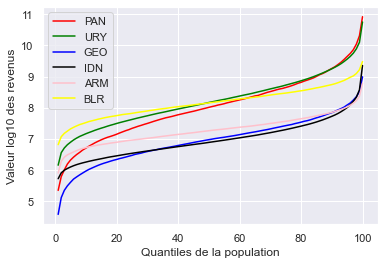

In [37]:
sns.set(style="darkgrid")
couleur=['red','green','blue','black','pink','yellow']
liste_pays=['PAN','URY','GEO','IDN','ARM','BLR']
for i in range(len(liste_pays)):
    temporaire=world_income.loc[(world_income['country']==liste_pays[i]),:]
    plt.plot(temporaire['quantile'],np.log(temporaire['income']),
             label=liste_pays[i],color=couleur[i])
plt.xlabel('Quantiles de la population')
plt.ylabel('Valeur log10 des revenus')    
plt.legend()
plt.show()

## Courbe de lorenz 

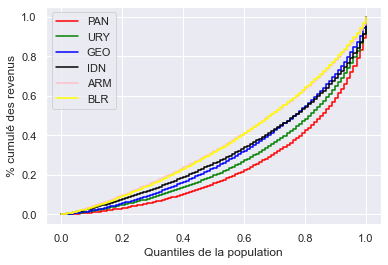

In [38]:
sns.set(style="darkgrid")
couleur=['red','green','blue','black','pink','yellow']
liste_pays=['PAN','URY','GEO','IDN','ARM','BLR']
for i in range(len(liste_pays)):
    temporaire=echantillon.loc[(echantillon['country']==liste_pays[i]),:]
    depenses = temporaire[temporaire['income'] > 0]
    dep = temporaire['income'].values
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',
         label=liste_pays[i],color=couleur[i])
plt.xlabel('Quantiles de la population')
plt.ylabel('% cumulé des revenus')
plt.legend()
plt.show()

## Indice de Gini

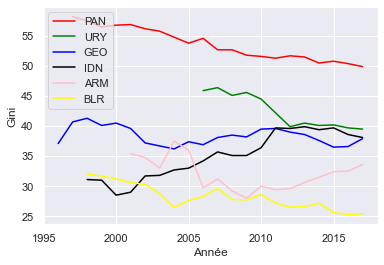

In [39]:
sns.set(style="darkgrid")
couleur=['red','green','blue','black','pink','yellow']
liste_pays=['PAN','URY','GEO','IDN','ARM','BLR']
annee=['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018']
anne_int = [int(i) for i in annee]
for i in range(len(liste_pays)):
    temporaire=gini.loc[(gini['Country Code']==liste_pays[i]),annee].transpose()
    plt.plot(anne_int,temporaire,label=liste_pays[i],color=couleur[i])
plt.xlabel('Année')
plt.ylabel('Gini')
plt.legend()
plt.show()

## Génération des indices de gini

Ici nous allons compléter notre jeu de données pour les indices de Gini

In [40]:
liste_pays1=world_income['country'].unique()

In [41]:
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [42]:
for i in range(len(liste_pays1)):
    temporaire=world_income.loc[(world_income['country']==liste_pays1[i]),:]
    depenses = temporaire[temporaire['income'] > 0]
    dep = temporaire['income'].values
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    #indice de gini 
    #Ici on peut voir que 5%-10% des clients font 25% du CA, puisque notre courbe remonte de manière anormale
    aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
    # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
    S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
    gini1 = 2*S
    world_income.loc[world_income['country']==liste_pays1[i],'gini']=gini1

In [43]:
world_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11600 non-null  float64
 6   gini          11600 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 634.5+ KB


In [44]:
world_income.head(n=3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini
0,ALB,2008,1,100,728.89795,7297.0,0.32141
1,ALB,2008,2,100,916.66235,7297.0,0.32141
2,ALB,2008,3,100,1010.91600,7297.0,0.32141


In [45]:
world_income['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

In [46]:
gini_ranking=world_income.loc[(world_income['year_survey']==2008),:]
gini_ranking

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini
0,ALB,2008,1,100,728.89795,7297.00000,0.321410
1,ALB,2008,2,100,916.66235,7297.00000,0.321410
2,ALB,2008,3,100,1010.91600,7297.00000,0.321410
3,ALB,2008,4,100,1086.90780,7297.00000,0.321410
4,ALB,2008,5,100,1132.69970,7297.00000,0.321410
...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,0.459403
11596,COD,2008,98,100,1057.80740,303.19305,0.459403
11597,COD,2008,99,100,1286.60290,303.19305,0.459403
11598,COD,2008,100,100,2243.12260,303.19305,0.459403


In [47]:
gini_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7600 entries, 0 to 11599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7600 non-null   object 
 1   year_survey   7600 non-null   int64  
 2   quantile      7600 non-null   int64  
 3   nb_quantiles  7600 non-null   int64  
 4   income        7600 non-null   float64
 5   gdpppp        7600 non-null   float64
 6   gini          7600 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 475.0+ KB


In [48]:
gini_ranking.head(n=4)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini
0,ALB,2008,1,100,728.89795,7297.0,0.32141
1,ALB,2008,2,100,916.66235,7297.0,0.32141
2,ALB,2008,3,100,1010.91600,7297.0,0.32141
3,ALB,2008,4,100,1086.90780,7297.0,0.32141


In [49]:
gini_ranking.drop_duplicates(subset ="country", 
                     keep = 'first', inplace = True) 

<ipython-input-49-4bbfbe3107c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gini_ranking.drop_duplicates(subset ="country",


In [50]:
gini_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 11499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       76 non-null     object 
 1   year_survey   76 non-null     int64  
 2   quantile      76 non-null     int64  
 3   nb_quantiles  76 non-null     int64  
 4   income        76 non-null     float64
 5   gdpppp        76 non-null     float64
 6   gini          76 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.8+ KB


In [51]:
gini_ranking['RANK']=gini_ranking['gini'].rank()

<ipython-input-51-6dbbfdc4afb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gini_ranking['RANK']=gini_ranking['gini'].rank()


In [52]:
#indice de Gini plus faible 
gini_ranking.sort_values(by=['gini']).head(n=5)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,RANK
9599,SVN,2008,1,100,2814.95300,27197.0,0.248249,1.0
9499,SVK,2008,1,100,791.46204,20515.0,0.264573,2.0
2300,CZE,2008,1,100,1586.24710,23223.0,0.270162,3.0
9699,SWE,2008,1,100,2284.43290,34371.0,0.272166,4.0
10699,UKR,2008,1,100,942.38495,6721.0,0.272415,5.0


In [53]:
#Indice de Gini plus fort 
gini_ranking.sort_values(by=['gini']).tail(n=5)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,RANK
1100,BOL,2008,1,100,20.584948,3950.0,0.575719,72.0
1400,CAF,2008,1,100,40.928130,685.0,0.575972,73.0
2000,COL,2008,1,100,62.605060,8185.0,0.583437,74.0
4000,HND,2008,1,100,50.166843,3628.0,0.615512,75.0
11399,ZAF,2008,1,100,60.490383,9602.0,0.682949,76.0


In [54]:
print(gini_ranking.loc[gini_ranking['country']=='FRA',:])

     country  year_survey  quantile  nb_quantiles    income   gdpppp     gini  \
3300     FRA         2008         1           100  2958.304  30357.0  0.34564   

      RANK  
3300  35.0  


# Mission 3 

In [55]:
elasticite=pd.read_csv('Data/GDIMMay2018.csv')
elasticite

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.10
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.10
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.10
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.10
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12246.0,0.047961,8677.0,0.230909,NaN,NaN,NaN,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,1830.0,0.023843,980.0,0.069934,NaN,NaN,NaN,NaN,0.16
6500,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,1948.0,0.010193,912.0,0.098336,NaN,NaN,NaN,NaN,0.16
6501,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,4375.0,0.016527,2269.0,0.072795,NaN,NaN,NaN,NaN,0.16
6502,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,2109.0,0.011469,1183.0,0.088865,NaN,NaN,NaN,NaN,0.16


In [56]:
elasticite['year'].unique()

array([1980, 1940, 1950, 1960, 1970], dtype=int64)

In [57]:
elasticite.head(n=4)

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.1
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.1
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.1
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.1


In [58]:
search_elast=elasticite.groupby(['iso3','region','incgroup4'])["IGEincome"].max().reset_index()
print(search_elast.shape) 

(150, 4)


In [59]:
search_elast=search_elast[['iso3','region','incgroup4','IGEincome']]
mean_elast=search_elast.groupby(['region','incgroup4']).mean().reset_index()
mean_elast

,region,incgroup4,IGEincome
0,East Asia & Pacific,Lower middle income,0.527665
1,East Asia & Pacific,Upper middle income,0.469500
2,Europe & Central Asia,Lower middle income,0.424817
3,Europe & Central Asia,Upper middle income,0.477171
4,High income,High income,0.346163
5,Latin America & Caribbean,Lower middle income,0.940737
6,Latin America & Caribbean,Upper middle income,0.878852
7,Middle East & North Africa,Lower middle income,0.916461
8,Middle East & North Africa,Upper middle income,0.517397
9,South Asia,Low income,0.436000


### Insertion des NAN

In [60]:
mean_elast.loc[mean_elast['IGEincome'].isnull(),'IGEincome']=0.4

Maldives : South asia,Upper middle income : 0.4

In [61]:
mean_elast.head(n=14)

,region,incgroup4,IGEincome
0,East Asia & Pacific,Lower middle income,0.527665
1,East Asia & Pacific,Upper middle income,0.469500
2,Europe & Central Asia,Lower middle income,0.424817
3,Europe & Central Asia,Upper middle income,0.477171
4,High income,High income,0.346163
5,Latin America & Caribbean,Lower middle income,0.940737
6,Latin America & Caribbean,Upper middle income,0.878852
7,Middle East & North Africa,Lower middle income,0.916461
8,Middle East & North Africa,Upper middle income,0.517397
9,South Asia,Low income,0.436000


### Jointure coeff d'élasticité

In [62]:
final_elas=search_elast.merge(mean_elast,
                            left_on=['region','incgroup4'],
                            right_on=['region','incgroup4'],
                           suffixes=('_bof', '_bon'))
final_elas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iso3           150 non-null    object 
 1   region         150 non-null    object 
 2   incgroup4      150 non-null    object 
 3   IGEincome_bof  75 non-null     float64
 4   IGEincome_bon  150 non-null    float64
dtypes: float64(2), object(3)
memory usage: 7.0+ KB


In [63]:
final_elas.to_csv("Data/final_elas.csv")
final_elas

,iso3,region,incgroup4,IGEincome_bof,IGEincome_bon
0,AFG,South Asia,Low income,NaN,0.436000
1,NPL,South Asia,Low income,0.436000,0.436000
2,AGO,Sub-Saharan Africa,Upper middle income,NaN,0.677000
3,BWA,Sub-Saharan Africa,Upper middle income,NaN,0.677000
4,GAB,Sub-Saharan Africa,Upper middle income,NaN,0.677000
...,...,...,...,...,...
145,IRN,Middle East & North Africa,Upper middle income,NaN,0.517397
146,IRQ,Middle East & North Africa,Upper middle income,NaN,0.517397
147,JOR,Middle East & North Africa,Upper middle income,0.517397,0.517397
148,LBN,Middle East & North Africa,Upper middle income,NaN,0.517397


In [64]:
final_elas=final_elas[['iso3','IGEincome_bon','IGEincome_bof']]

In [65]:
final_elas.head(n=4)

,iso3,IGEincome_bon,IGEincome_bof
0,AFG,0.436,NaN
1,NPL,0.436,0.436
2,AGO,0.677,NaN
3,BWA,0.677,NaN


In [66]:
final_elas.loc[final_elas['iso3']=='XKX',:]

,iso3,IGEincome_bon,IGEincome_bof


In [67]:
final_elas.groupby(['iso3']).mean().head(n=6)

,IGEincome_bon,IGEincome_bof
iso3,,
AFG,0.436000,NaN
AGO,0.677000,NaN
ALB,0.477171,0.815874
ARG,0.878852,NaN
ARM,0.424817,NaN
AUS,0.346163,0.275000


In [68]:
final_elas.loc[final_elas['IGEincome_bof'].isnull()
               ,'IGEincome_bof']=final_elas.loc[final_elas['IGEincome_bof'].isnull(),
                                                'IGEincome_bon']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [69]:
final_elas.head(n=4)

,iso3,IGEincome_bon,IGEincome_bof
0,AFG,0.436,0.436
1,NPL,0.436,0.436
2,AGO,0.677,0.677
3,BWA,0.677,0.677


In [70]:
final_elas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iso3           150 non-null    object 
 1   IGEincome_bon  150 non-null    float64
 2   IGEincome_bof  150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [71]:
final_elas.groupby(['iso3']).mean().head(n=6)

,IGEincome_bon,IGEincome_bof
iso3,,
AFG,0.436000,0.436000
AGO,0.677000,0.677000
ALB,0.477171,0.815874
ARG,0.878852,0.878852
ARM,0.424817,0.424817
AUS,0.346163,0.275000


In [72]:
import scipy.stats as st
import pandas as pd
import numpy as np
from collections import Counter

def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
    
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

pj = 0.9                 # coefficient d'élasticité du pays j
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
#plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
print(cd)

c_i_child = 5 
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))

[[0.253 0.114 0.083 ... 0.    0.    0.   ]
 [0.109 0.095 0.072 ... 0.    0.    0.   ]
 [0.089 0.076 0.069 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.064 0.07  0.081]
 [0.    0.    0.    ... 0.087 0.089 0.119]
 [0.    0.    0.    ... 0.07  0.115 0.231]]

P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.026


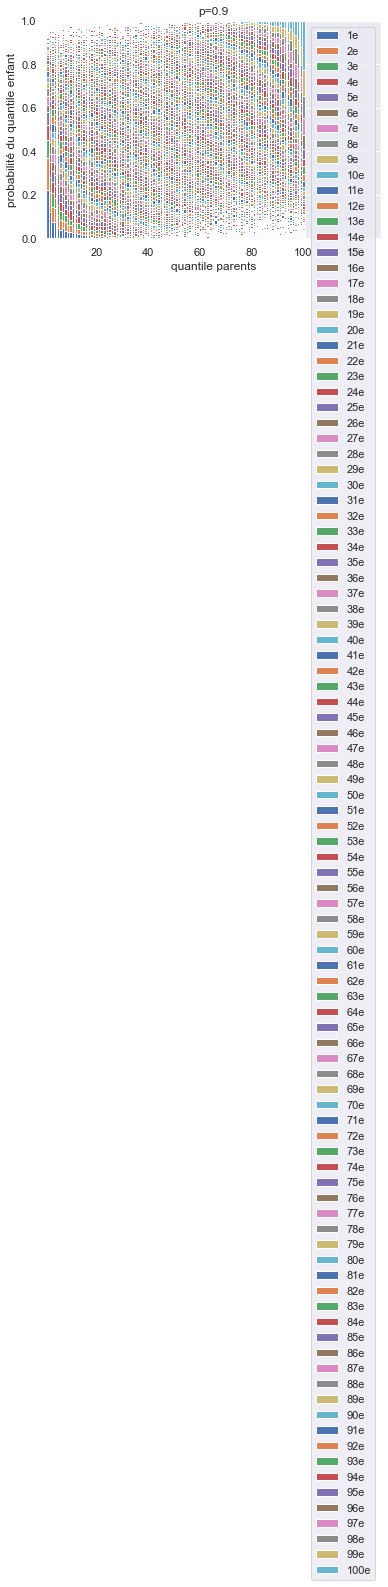

[[0.224 0.122 0.076 ... 0.    0.    0.   ]
 [0.144 0.092 0.067 ... 0.    0.    0.   ]
 [0.087 0.069 0.064 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.067 0.054 0.1  ]
 [0.    0.    0.    ... 0.062 0.084 0.123]
 [0.    0.    0.    ... 0.087 0.119 0.224]]

P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.032


(array([2.56121622, 1.89742669, 0.95028903, ..., 3.0119167 , 1.34969382,
        0.98610587]),
 array([1.1130008 , 0.84923708, 1.00479616, ..., 0.3501313 , 1.44324872,
        0.85097069]))

In [73]:
import scipy.stats as st
import pandas as pd
import numpy as np
from collections import Counter

pj = 0.9 # coefficient d'élasticité du pays j
nb_quantiles = 100 # nombre de quantiles (nombre de classes de revenu)
n = 1000*nb_quantiles # taille de l'échantillon
y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps
#si nb_quantiles > 10
print(cd)
c_i_child = 5
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child,
pj, p))

generate_incomes(n,pj)



##### cd: condionnal distribution 
    

In [74]:
final_elas.reset_index()

,index,iso3,IGEincome_bon,IGEincome_bof
0,0,AFG,0.436000,0.436000
1,1,NPL,0.436000,0.436000
2,2,AGO,0.677000,0.677000
3,3,BWA,0.677000,0.677000
4,4,GAB,0.677000,0.677000
...,...,...,...,...
145,145,IRN,0.517397,0.517397
146,146,IRQ,0.517397,0.517397
147,147,JOR,0.517397,0.517397
148,148,LBN,0.517397,0.517397


In [75]:
ig=final_elas.sort_values(by="IGEincome_bon")
ig

,iso3,IGEincome_bon,IGEincome_bof
74,SWE,0.346163,0.259600
56,HUN,0.346163,0.346163
55,HRV,0.346163,0.464077
54,GRC,0.346163,0.312578
53,GBR,0.346163,0.480978
...,...,...,...
105,BOL,0.940737,0.866268
106,GTM,0.940737,1.015206
107,HND,0.940737,0.940737
108,NIC,0.940737,0.940737


###### ****SQ8

In [76]:
final_dataset=world_income.merge(final_elas,how='left', 
                         left_on=['country'], 
                         right_on=['iso3'])

In [77]:
final_dataset.head(n=3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,iso3,IGEincome_bon,IGEincome_bof
0,ALB,2008,1,100,728.89795,7297.0,0.32141,ALB,0.477171,0.815874
1,ALB,2008,2,100,916.66235,7297.0,0.32141,ALB,0.477171,0.815874
2,ALB,2008,3,100,1010.91600,7297.0,0.32141,ALB,0.477171,0.815874


In [78]:
final_dataset=final_dataset[['country','quantile','nb_quantiles',
                            'gdpppp','income','gini','IGEincome_bof']]

In [79]:
final_dataset.head(n=3)

,country,quantile,nb_quantiles,gdpppp,income,gini,IGEincome_bof
0,ALB,1,100,7297.0,728.89795,0.32141,0.815874
1,ALB,2,100,7297.0,916.66235,0.32141,0.815874
2,ALB,3,100,7297.0,1010.91600,0.32141,0.815874


In [80]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 11599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        11600 non-null  object 
 1   quantile       11600 non-null  int64  
 2   nb_quantiles   11600 non-null  int64  
 3   gdpppp         11600 non-null  float64
 4   income         11600 non-null  float64
 5   gini           11600 non-null  float64
 6   IGEincome_bof  11400 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 725.0+ KB


In [81]:
final_dataset=final_dataset.rename({'IGEincome_bof':'coeff_elas'},axis=1)

In [82]:
final_dataset.loc[final_dataset['coeff_elas'].isnull(),:]

,country,quantile,nb_quantiles,gdpppp,income,gini,coeff_elas
5800,XKX,1,100,6971.208,437.89370,0.331163,NaN
5801,XKX,2,100,6971.208,508.17133,0.331163,NaN
5802,XKX,3,100,6971.208,591.82820,0.331163,NaN
5803,XKX,4,100,6971.208,668.00000,0.331163,NaN
5804,XKX,5,100,6971.208,730.40220,0.331163,NaN
...,...,...,...,...,...,...,...
9994,SYR,96,100,4512.000,1702.83960,0.373873,NaN
9995,SYR,97,100,4512.000,1883.93970,0.373873,NaN
9996,SYR,98,100,4512.000,2157.02400,0.373873,NaN
9997,SYR,99,100,4512.000,2622.62130,0.373873,NaN


In [83]:
final_dataset=final_dataset.loc[~final_dataset['coeff_elas'].isnull(),:]

In [84]:
xkx=3877

In [85]:
big_data = pd.concat([final_dataset]*500, ignore_index=True)

In [86]:
print(big_data.shape)

(5700000, 7)


In [87]:
500*11600

5800000

In [88]:
big_data=big_data.sort_values(by=['country','quantile']).reset_index()

In [89]:
big_data.head(n=4)

,index,country,quantile,nb_quantiles,gdpppp,income,gini,coeff_elas
0,0,ALB,1,100,7297.0,728.89795,0.32141,0.815874
1,11400,ALB,1,100,7297.0,728.89795,0.32141,0.815874
2,22800,ALB,1,100,7297.0,728.89795,0.32141,0.815874
3,34200,ALB,1,100,7297.0,728.89795,0.32141,0.815874


In [90]:
test=big_data.loc[big_data['country']=='ALB',:]

In [91]:
print(test.shape)

(50000, 8)


Le bout de code ci-dessous prend un temps énorme à tourner, pour gagner du temps vous pouvez le mettre en commentaire et télécharger le jeu de données big data pour aller plus vite

In [92]:
pays_list=big_data['country'].unique()
classe_parent=0
classe_enfant=0
list_prob=[]

for pays in pays_list:
    pj=big_data.loc[big_data['country']==pays,'coeff_elas'].iloc[0]
    nb_quantiles = 100 # nombre de quantiles (nombre de classes de revenu)
    n = 50000 # taille de l'échantillon
    y_child, y_parents = generate_incomes(n, pj)
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    cd = conditional_distributions(sample, nb_quantiles)
    for c_i_child in range(100):
        for c_i_parent in range(100):
            p = proba_cond(c_i_parent, c_i_child, cd)
            #print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child,pj,p)) 
            list_prob.extend([c_i_parent+1]*(int(p*500)))


In [93]:
len(list_prob)

5700000

In [94]:
list_prob

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,


In [95]:
big_data['country'].unique().shape

(114,)

In [96]:
big_data['proba']=list_prob

In [97]:
big_data.to_csv("Data/big_data.csv")

# Mission 4

In [98]:
print(big_data.shape)

(5700000, 9)


In [99]:
big_data['log']=np.log(big_data['gdpppp'])

In [100]:
big_data.head(n=7)

,index,country,quantile,nb_quantiles,gdpppp,income,gini,coeff_elas,proba,log
0,0,ALB,1,100,7297.0,728.89795,0.32141,0.815874,1,8.895219
1,11400,ALB,1,100,7297.0,728.89795,0.32141,0.815874,1,8.895219
2,22800,ALB,1,100,7297.0,728.89795,0.32141,0.815874,1,8.895219
3,34200,ALB,1,100,7297.0,728.89795,0.32141,0.815874,1,8.895219
4,45600,ALB,1,100,7297.0,728.89795,0.32141,0.815874,1,8.895219
5,57000,ALB,1,100,7297.0,728.89795,0.32141,0.815874,1,8.895219
6,68400,ALB,1,100,7297.0,728.89795,0.32141,0.815874,1,8.895219


In [101]:
big_data=big_data.rename({'proba':'classe_parent'},
                         axis=1)

In [102]:
big_data=big_data[[ 'country', 'quantile', 'nb_quantiles', 'gdpppp',
       'income','log', 'gini', 'coeff_elas', 'classe_parent']]

# Anova

In [103]:
question_1=big_data.groupby(['country','quantile']).mean().reset_index()
question_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11400 entries, 0 to 11399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        11400 non-null  object 
 1   quantile       11400 non-null  int64  
 2   nb_quantiles   11400 non-null  float64
 3   gdpppp         11400 non-null  float64
 4   income         11400 non-null  float64
 5   log            11400 non-null  float64
 6   gini           11400 non-null  float64
 7   coeff_elas     11400 non-null  float64
 8   classe_parent  11400 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 801.7+ KB


In [104]:
question_1.head(n=3)

,country,quantile,nb_quantiles,gdpppp,income,log,gini,coeff_elas,classe_parent
0,ALB,1,100.0,7297.0,728.89795,8.895219,0.32141,0.815875,10.130
1,ALB,2,100.0,7297.0,916.66235,8.895219,0.32141,0.815875,14.550
2,ALB,3,100.0,7297.0,1010.91600,8.895219,0.32141,0.815875,15.382


In [105]:
#analyse de la variance de revenu en fonction de pays 
anova_variete = smf.ols('income~country', data=question_1).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     97.62
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:29   Log-Likelihood:            -1.1667e+05
No. Observations:               11400   AIC:                         2.336e+05
Df Residuals:                   11286   BIC:                         2.344e+05
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2994.8299    677.113      4.

 ## Test de fisher 
Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test ( 0 ) est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle  α1=α2=α3=α4=0 .

Le pays a donc bien un effet sur les revenus  

In [106]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
country,5.057486e+11,113.0,97.618882,0.0
Residual,5.174430e+11,11286.0,NaN,NaN


In [107]:
test=sm.stats.anova_lm(anova_variete, typ=2)
SCE=test.iloc[0,0]
SCR=test.iloc[1,0]
variab_pays=SCE/(SCE+SCR)

In [108]:
variab_pays

0.49428536419669755

# 2ème Regression 

In [109]:
question_2=big_data.copy()

In [110]:
merge1=big_data.groupby(['country']).mean().reset_index()[['country','income']]

In [111]:
merge1.head(n=3)

,country,income
0,ALB,2994.829902
1,ARG,5847.884654
2,ARM,1628.382785


In [112]:
regression_2=question_2.merge(merge1, 
                         left_on=['country'], 
                         right_on=['country'],
                        suffixes=('_normal', '_mean'))

In [113]:
print(regression_2.columns)

Index(['country', 'quantile', 'nb_quantiles', 'gdpppp', 'income_normal', 'log',
       'gini', 'coeff_elas', 'classe_parent', 'income_mean'],
      dtype='object')


In [114]:
reg_multi = smf.ols('income_normal~income_mean+gini', data=regression_2).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:          income_normal   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 2.786e+06
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:40   Log-Likelihood:            -5.8336e+07
No. Observations:             5700000   AIC:                         1.167e+08
Df Residuals:                 5699997   BIC:                         1.167e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.445e-09     14.978    2.3e-10      

In [115]:
sm.stats.anova_lm(reg_multi, typ=2)

,sum_sq,df,F,PR(>F)
income_mean,2.194865e+14,1.0,4.835596e+06,0.0
gini,4.239674e-11,1.0,9.340596e-19,1.0
Residual,2.587215e+14,5699997.0,NaN,NaN


In [116]:
analyse1=sm.stats.anova_lm(reg_multi, typ=2)
SCE=analyse1.iloc[0,0]
SCR=analyse1.iloc[2,0]
income_var=SCE/(SCE+SCR)

In [117]:
print('La variance expliquée du revenue moyen  :',income_var*100)

La variance expliquée du revenue moyen  : 45.897712941161146


In [118]:
analyse1=sm.stats.anova_lm(reg_multi, typ=2)
SCE_gini=analyse1.iloc[1,0]
SCR_gini=analyse1.iloc[2,0]
gini_var=SCE_gini/(SCE_gini+SCR_gini)

In [119]:
print('La variance expliquée de l indice de gini est de :', gini_var)

La variance expliquée de l indice de gini est de : 1.6387018318173399e-25


# 2ème Regression  log

In [120]:
question3=regression_2.copy()

In [121]:
question3['log_income']=np.log(question3['income_normal'])

In [122]:
question3['log_income_mean']=np.log(question3['income_mean'])

In [123]:
reg_multi1 = smf.ols('log_income~log_income_mean+gini', data=question3).fit()
print(reg_multi1.summary())

                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 7.631e+06
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:48   Log-Likelihood:            -6.2259e+06
No. Observations:             5700000   AIC:                         1.245e+07
Df Residuals:                 5699997   BIC:                         1.245e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4963      0.003    1

In [124]:
analyse2=sm.stats.anova_lm(reg_multi1, typ=2)
SCE_log=analyse2.iloc[0,0]
SCR_log=analyse2.iloc[2,0]
log=SCE_log/(SCE_log+SCR_log)

In [125]:
print('La variance expliquée du revenue moyen par hab en log  est de :',log*100,'%')

La variance expliquée du revenue moyen par hab en log  est de : 69.44383981473248 %


In [126]:
analyse2=sm.stats.anova_lm(reg_multi1, typ=2)
SCE_gini=analyse2.iloc[1,0]
SCR_gini=analyse2.iloc[2,0]
gini_var=SCE_gini/(SCE_gini+SCR_gini)

In [127]:
gini_var

0.03704583557244491

# 3ème Règression 

In [128]:
reg_multi2 = smf.ols('income_normal~income_mean+gini+classe_parent', data=question3).fit()
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:          income_normal   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 2.059e+06
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:56   Log-Likelihood:            -5.8186e+07
No. Observations:             5700000   AIC:                         1.164e+08
Df Residuals:                 5699996   BIC:                         1.164e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2663.2029     15.362   -173.358

In [129]:
analyse3=sm.stats.anova_lm(reg_multi2, typ=2)
SCE_class_p=analyse3.iloc[2,0]
SCR_class_p=analyse3.iloc[3,0]
classe_parent_var=SCE_class_p/(SCE_class_p+SCR_class_p)

In [130]:
print('La variance expliquée de la classe parent  est de :',classe_parent_var*100,'%')

La variance expliquée de la classe parent  est de : 5.105560753514578 %


# 3ème Règression log

In [131]:
reg_multi3 = smf.ols('log_income~log_income_mean+gini+classe_parent', data=question3).fit()
print(reg_multi3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 6.858e+06
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:51:03   Log-Likelihood:            -5.5820e+06
No. Observations:             5700000   AIC:                         1.116e+07
Df Residuals:                 5699996   BIC:                         1.116e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0712      0.003    -

In [132]:
analyse4=sm.stats.anova_lm(reg_multi3, typ=2)
SCE_class_log=analyse3.iloc[2,0]
SCR_class_log=analyse3.iloc[3,0]
classe_parent_log=SCE_class_log/(SCE_class_log+SCR_class_log)

In [133]:
print('La variance expliquée de la classe parent  est de :',classe_parent_log*100,'%')

La variance expliquée de la classe parent  est de : 5.105560753514578 %


## Pour aller plus loin : analysons nos résultats

Reprenons la régression linéaire multiple que nous avons obtenue :

reg_multi1 : regression avec income~log+gini

In [134]:
print(reg_multi3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 6.858e+06
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:51:06   Log-Likelihood:            -5.5820e+06
No. Observations:             5700000   AIC:                         1.116e+07
Df Residuals:                 5699996   BIC:                         1.116e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0712      0.003    -

Nous allons ici réaliser les tests à un niveau $\alpha=5$% :

In [135]:
alpha = 0.05

Récupérons $n$, le nombre d'individus de l'échantillon, et $p$, le nombre de variables.

In [136]:
n = big_data.shape[0]
p = 2

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé analyses.

In [137]:
big_data['obs']=np.expand_dims(np.arange(1,n+1), axis=1)

## Calculez les leviers

 l’effet de levier (ou poids) de chaque donnée sur sa propre estimation. Une donnée est considérée comme atypique lorsque cette valeur est inférieure à 0.05.
 
On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2∗\frac{p}{n}$.

In [138]:
big_data['levier'] = reg_multi3.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

In [139]:
seuil_levier

7.017543859649123e-07

Pour sélectionner les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [140]:
levier=big_data.loc[big_data['levier'] > seuil_levier, :]

In [141]:
print(levier.shape)

(2495000, 11)


In [142]:
levier.head(n=8)

,country,quantile,nb_quantiles,gdpppp,income,log,gini,coeff_elas,classe_parent,obs,levier
0,ALB,1,100,7297.0,728.89795,8.895219,0.32141,0.815874,1,1,8.349598e-07
1,ALB,1,100,7297.0,728.89795,8.895219,0.32141,0.815874,1,2,8.349598e-07
2,ALB,1,100,7297.0,728.89795,8.895219,0.32141,0.815874,1,3,8.349598e-07
3,ALB,1,100,7297.0,728.89795,8.895219,0.32141,0.815874,1,4,8.349598e-07
4,ALB,1,100,7297.0,728.89795,8.895219,0.32141,0.815874,1,5,8.349598e-07
5,ALB,1,100,7297.0,728.89795,8.895219,0.32141,0.815874,1,6,8.349598e-07
6,ALB,1,100,7297.0,728.89795,8.895219,0.32141,0.815874,1,7,8.349598e-07
7,ALB,1,100,7297.0,728.89795,8.895219,0.32141,0.815874,1,8,8.349598e-07


##  Calculez les résidus studentisés
Permet également de mettre en évidence les outliers

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :



In [143]:
big_data['rstudent'] = reg_multi3.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [144]:
residus=big_data.loc[big_data['rstudent'] > seuil_rstudent, :]

In [145]:
print(residus.columns)

Index(['country', 'quantile', 'nb_quantiles', 'gdpppp', 'income', 'log',
       'gini', 'coeff_elas', 'classe_parent', 'obs', 'levier', 'rstudent'],
      dtype='object')


In [146]:
residus1=residus.copy()

In [147]:
print(residus.shape)

(160271, 12)


In [148]:
residus=residus.merge(final_elas1,
                            left_on=['country'],
                            right_on=['iso3'],
                           suffixes=('_bof', '_bon'))

In [149]:
final_elas1.head()

,Unnamed: 0,iso3,region,incgroup4,IGEincome_bof,IGEincome_bon
0,0,AFG,South Asia,Low income,NaN,0.436
1,1,NPL,South Asia,Low income,0.436,0.436
2,2,AGO,Sub-Saharan Africa,Upper middle income,NaN,0.677
3,3,BWA,Sub-Saharan Africa,Upper middle income,NaN,0.677
4,4,GAB,Sub-Saharan Africa,Upper middle income,NaN,0.677


In [150]:
residus[['country','region','incgroup4']].head(n=3)

,country,region,incgroup4
0,ALB,Europe & Central Asia,Upper middle income
1,ALB,Europe & Central Asia,Upper middle income
2,ALB,Europe & Central Asia,Upper middle income


In [151]:
residus=residus.groupby(['country','incgroup4']).mean().reset_index()

In [152]:
residus.head(n=9)

,country,incgroup4,quantile,nb_quantiles,gdpppp,income,log,gini,coeff_elas,classe_parent,obs,levier,rstudent,Unnamed: 0,IGEincome_bof,IGEincome_bon
0,ALB,Upper middle income,99.904135,100.0,7297.0000,17206.708207,8.895219,0.321410,0.815875,87.432331,49688.020677,6.749351e-07,2.273697,8.0,0.815875,0.477171
1,ARG,Upper middle income,97.473900,100.0,13220.0000,26659.527880,9.489486,0.465249,0.878852,72.377126,98403.451026,6.262084e-07,2.427345,21.0,NaN,0.878852
2,ARM,Lower middle income,99.461538,100.0,5611.0000,5714.042860,8.632484,0.280305,0.424817,36.307692,149282.076923,7.898047e-07,2.260321,32.0,NaN,0.424817
3,AUT,High income,98.908184,100.0,36193.0000,57111.647471,10.496621,0.295326,0.245267,34.562874,199040.307385,7.950885e-07,2.311612,40.0,0.245267,0.346163
4,AZE,Upper middle income,98.894400,100.0,8101.0000,9729.440392,8.999743,0.329031,0.477171,55.124800,249072.102400,5.236536e-07,2.272374,9.0,NaN,0.477171
5,BEL,High income,99.375683,100.0,33561.0000,68097.255697,10.421120,0.301580,0.183176,49.020492,299370.994536,7.847506e-07,2.468737,41.0,0.183176,0.346163
6,BFA,Low income,98.409562,100.0,1085.5139,5012.493542,6.989809,0.413469,0.673630,68.729880,348865.216733,6.345327e-07,2.572436,79.0,NaN,0.673630
7,BGD,Lower middle income,99.213049,100.0,1233.0000,4917.254423,7.117206,0.333113,0.538000,64.403462,399284.206391,8.084254e-07,2.370502,100.0,0.538000,0.528167
8,BGR,Upper middle income,98.206531,100.0,11993.0000,20677.144748,9.392078,0.378137,0.477171,54.222418,448745.072374,3.965210e-07,2.410866,10.0,NaN,0.477171


## Vérifier la colinéarité des variables

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [153]:
variables = reg_multi3.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0822115727482575, 1.082211572746755, 0.9999999999999982]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

## Testez l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [154]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi3.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


La p-valeur ici est inférieure à  5 %, on rejette l'hypothèse  𝐻0  selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

## Testez la normalité des résidus
Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [155]:
shapiro(reg_multi3.resid)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9750881791114807, pvalue=0.0)

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien

In [156]:
residus_reg3=reg_multi3.resid

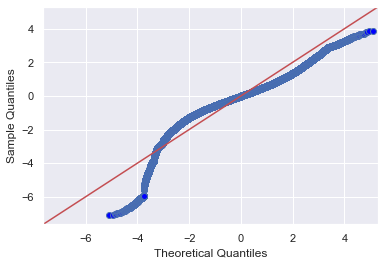

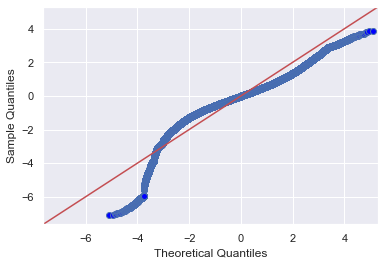

In [157]:
sm.qqplot(residus_reg3,line='45')

# Transformation en log

<AxesSubplot:ylabel='income'>

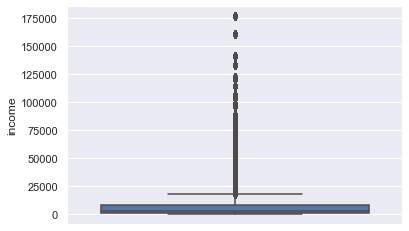

In [158]:
sns.boxplot( y=big_data["income"] )


<AxesSubplot:ylabel='log_income'>

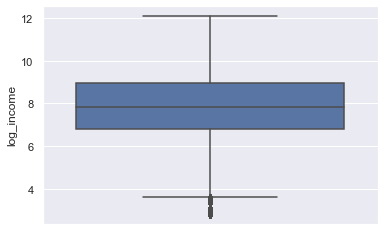

In [159]:
sns.boxplot( y=question3["log_income"] )